# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Elizabeth Ramírez Z.
- Nombre de alumno 2: Lucas Orellana J.

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ElLuquitas/MDS7202-labs)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

In [28]:
#Análisis de datos
import pandas as pd
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [29]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


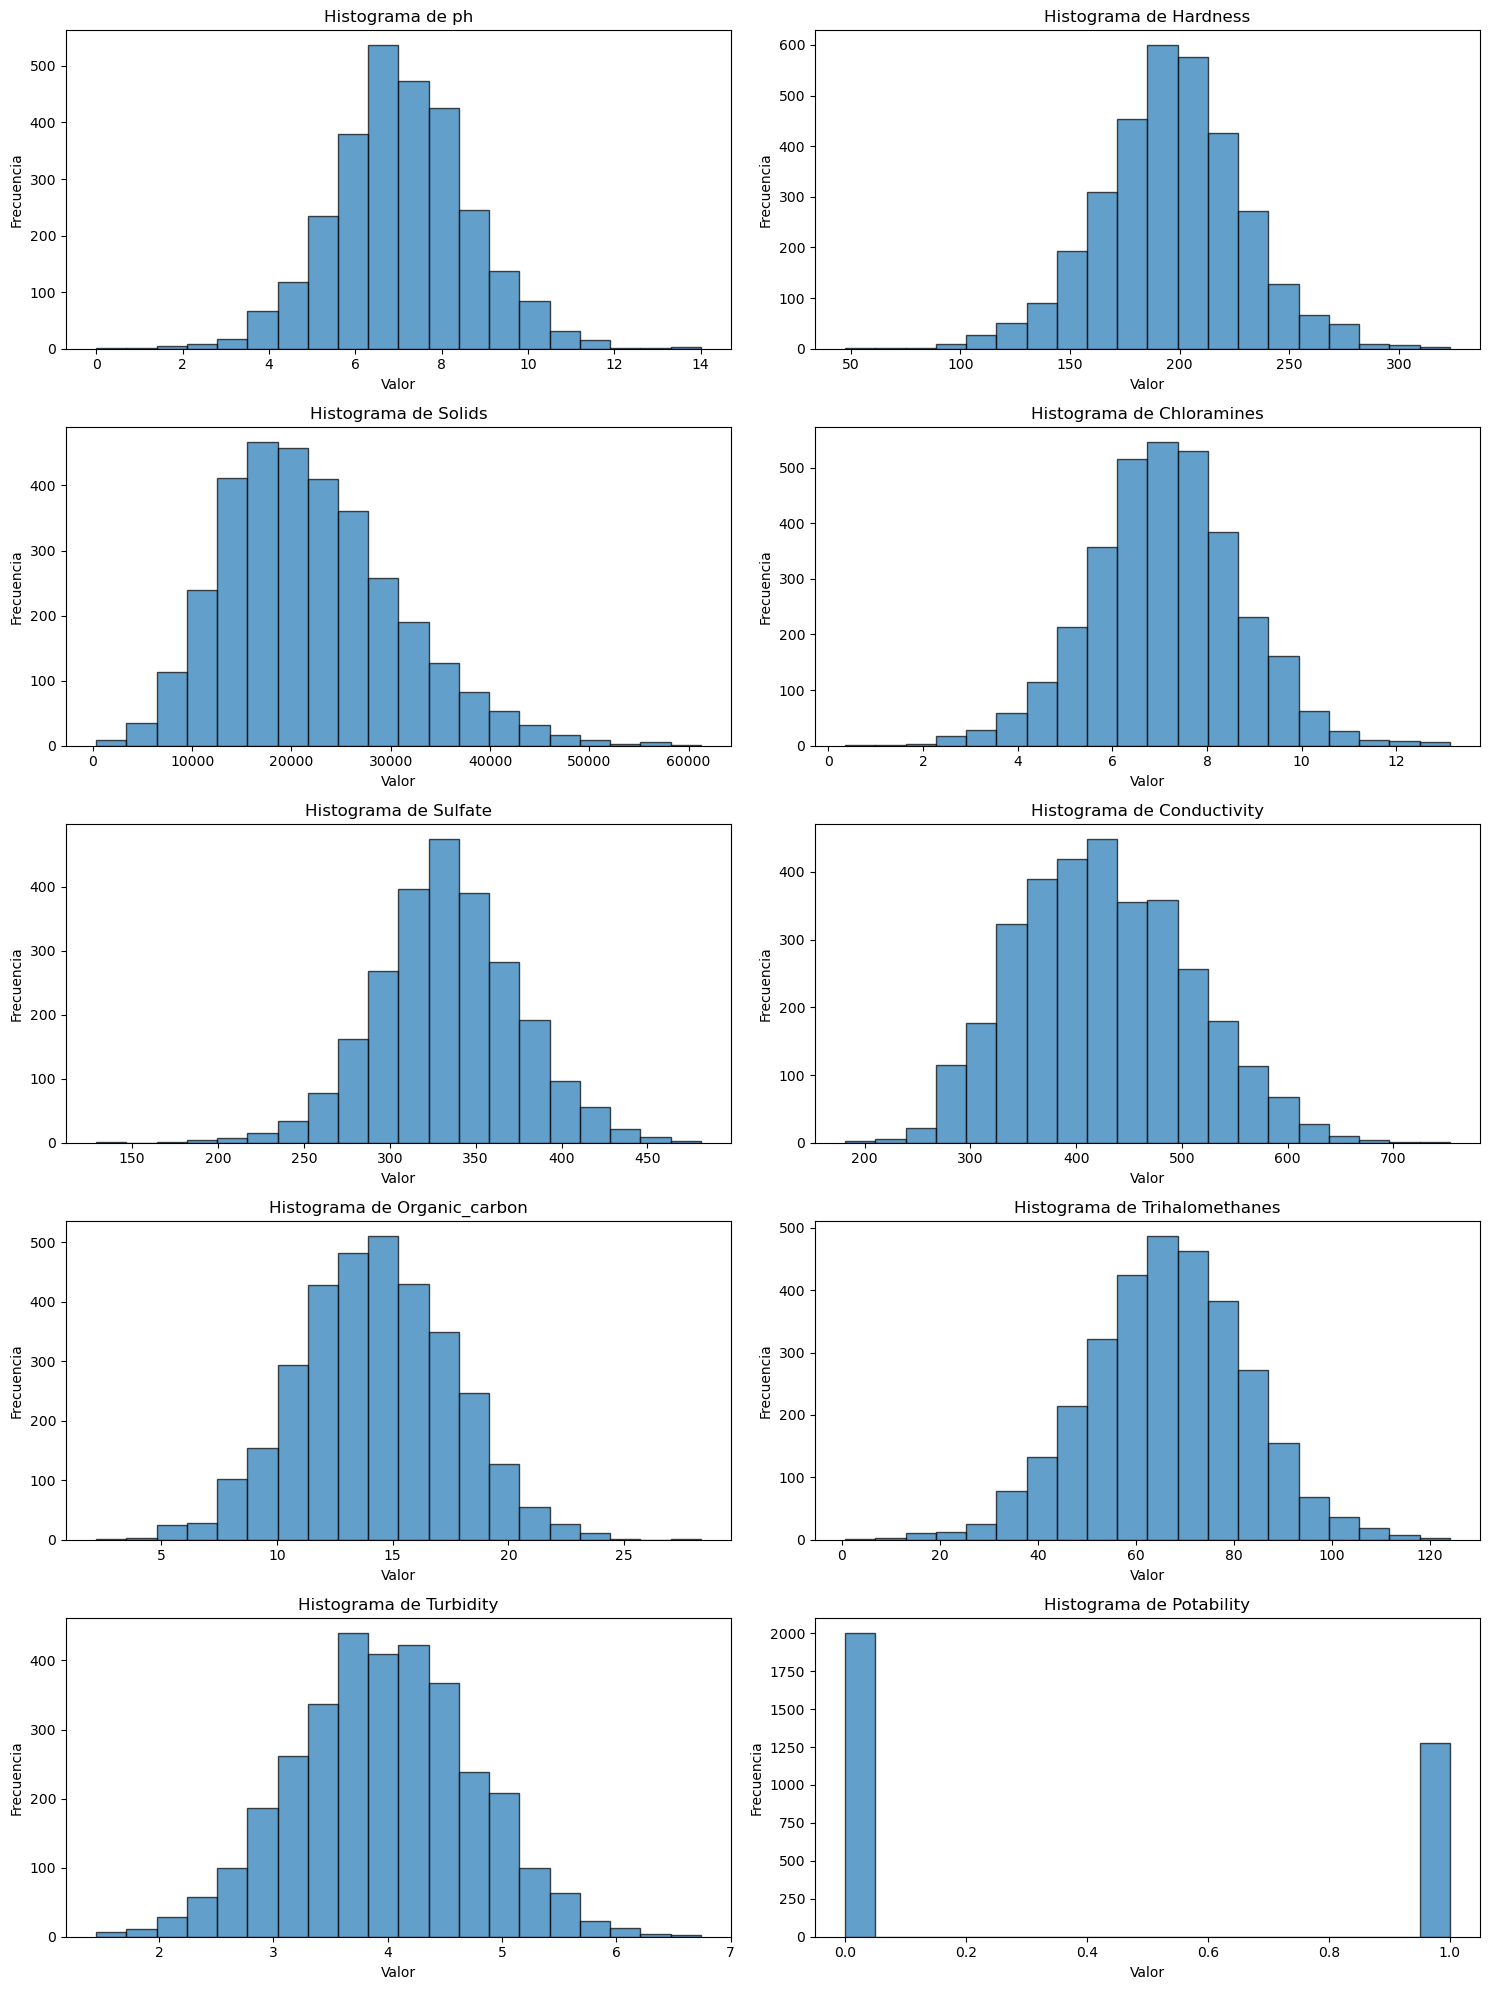

In [30]:
import matplotlib.pyplot as plt

# Configurar la figura con 5 filas y 2 columnas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Generar un histograma para cada columna
for i, col in enumerate(data.columns):
    ax = axes[i // 2, i % 2]  # Ubicar cada subplot
    ax.hist(data[col], bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si las columnas son menos de 10
for j in range(len(data.columns), 10):
    fig.delaxes(axes[j // 2, j % 2])

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

**Comentarios sobre los datos**
Dado que los datos en general siguen una distribución normal o similar a la normal (excepto la potabilidad que es binario), no se cree necesario escalar los datos. Sin embargo, los máximos y mínimos de las distintas variables sí son diferentes y por ello se hará un escalamiento con MinMaxScaler.



In [31]:
# Contar valores NaN en cada columna
nan_counts = data.isnull().sum()

# Mostrar los resultados
print(nan_counts)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [32]:
data.shape#hay 3276 filas con datos

(3276, 10)

In [33]:
# Eliminar todas las filas que contienen valores NaN
data_clean = data.dropna()

data_clean.shape #al eliminar los nan, quedan 2011 filas

(2011, 10)

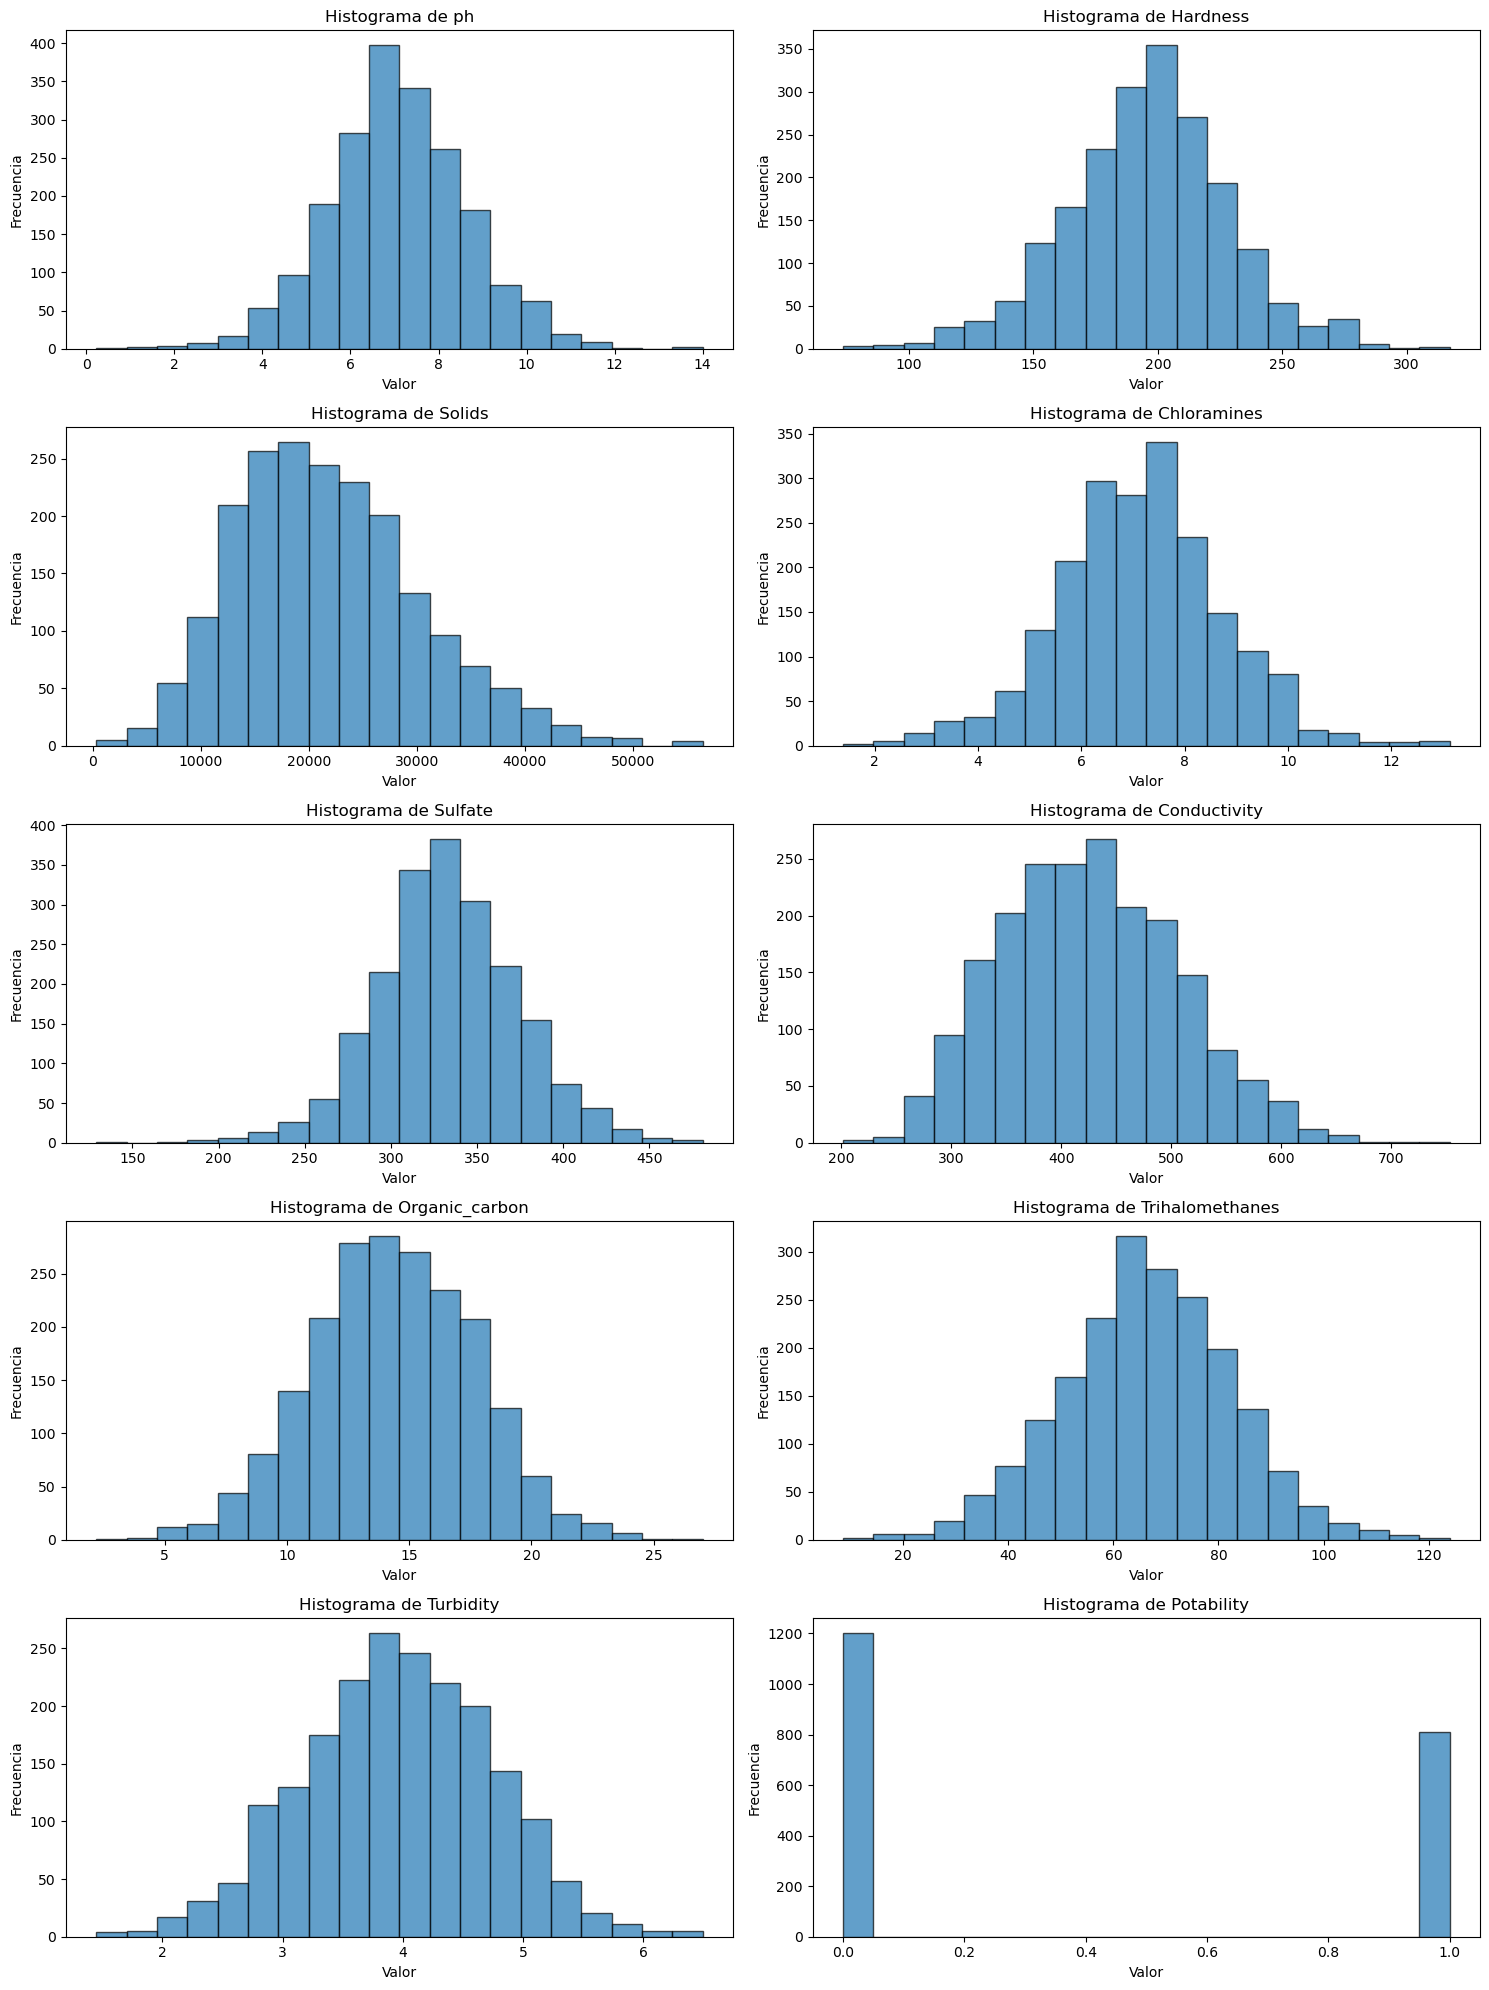

In [34]:
# Configurar la figura con 5 filas y 2 columnas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Generar un histograma para cada columna
for i, col in enumerate(data_clean.columns):
    ax = axes[i // 2, i % 2]  # Ubicar cada subplot
    ax.hist(data_clean[col], bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si las columnas son menos de 10
for j in range(len(data_clean.columns), 10):
    fig.delaxes(axes[j // 2, j % 2])

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Crear una copia para preservar el DataFrame original (opcional)
data_scaled = data_clean.copy()

# Seleccionar las columnas a escalar
columns_to_scale = [col for col in data_clean.columns if col != 'Potability']

# Crear y ajustar el escalador
scaler = MinMaxScaler()
data_scaled[columns_to_scale] = scaler.fit_transform(data_clean[columns_to_scale])

# Revisar los resultados
print(data_scaled.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
3  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
4  0.643654  0.441300  0.314381     0.439304  0.514545      0.356685   
5  0.388934  0.470876  0.506122     0.524364  0.561537      0.142913   
6  0.725820  0.715942  0.506141     0.521683  0.751819      0.148683   
7  0.610517  0.532588  0.237701     0.270288  0.495155      0.494792   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3        0.654522         0.795029   0.630115           0  
4        0.377248         0.202914   0.520358           0  
5        0.249922         0.401487   0.219973           0  
6        0.467200         0.658678   0.242428           0  
7        0.409721         0.469762   0.585049           0  


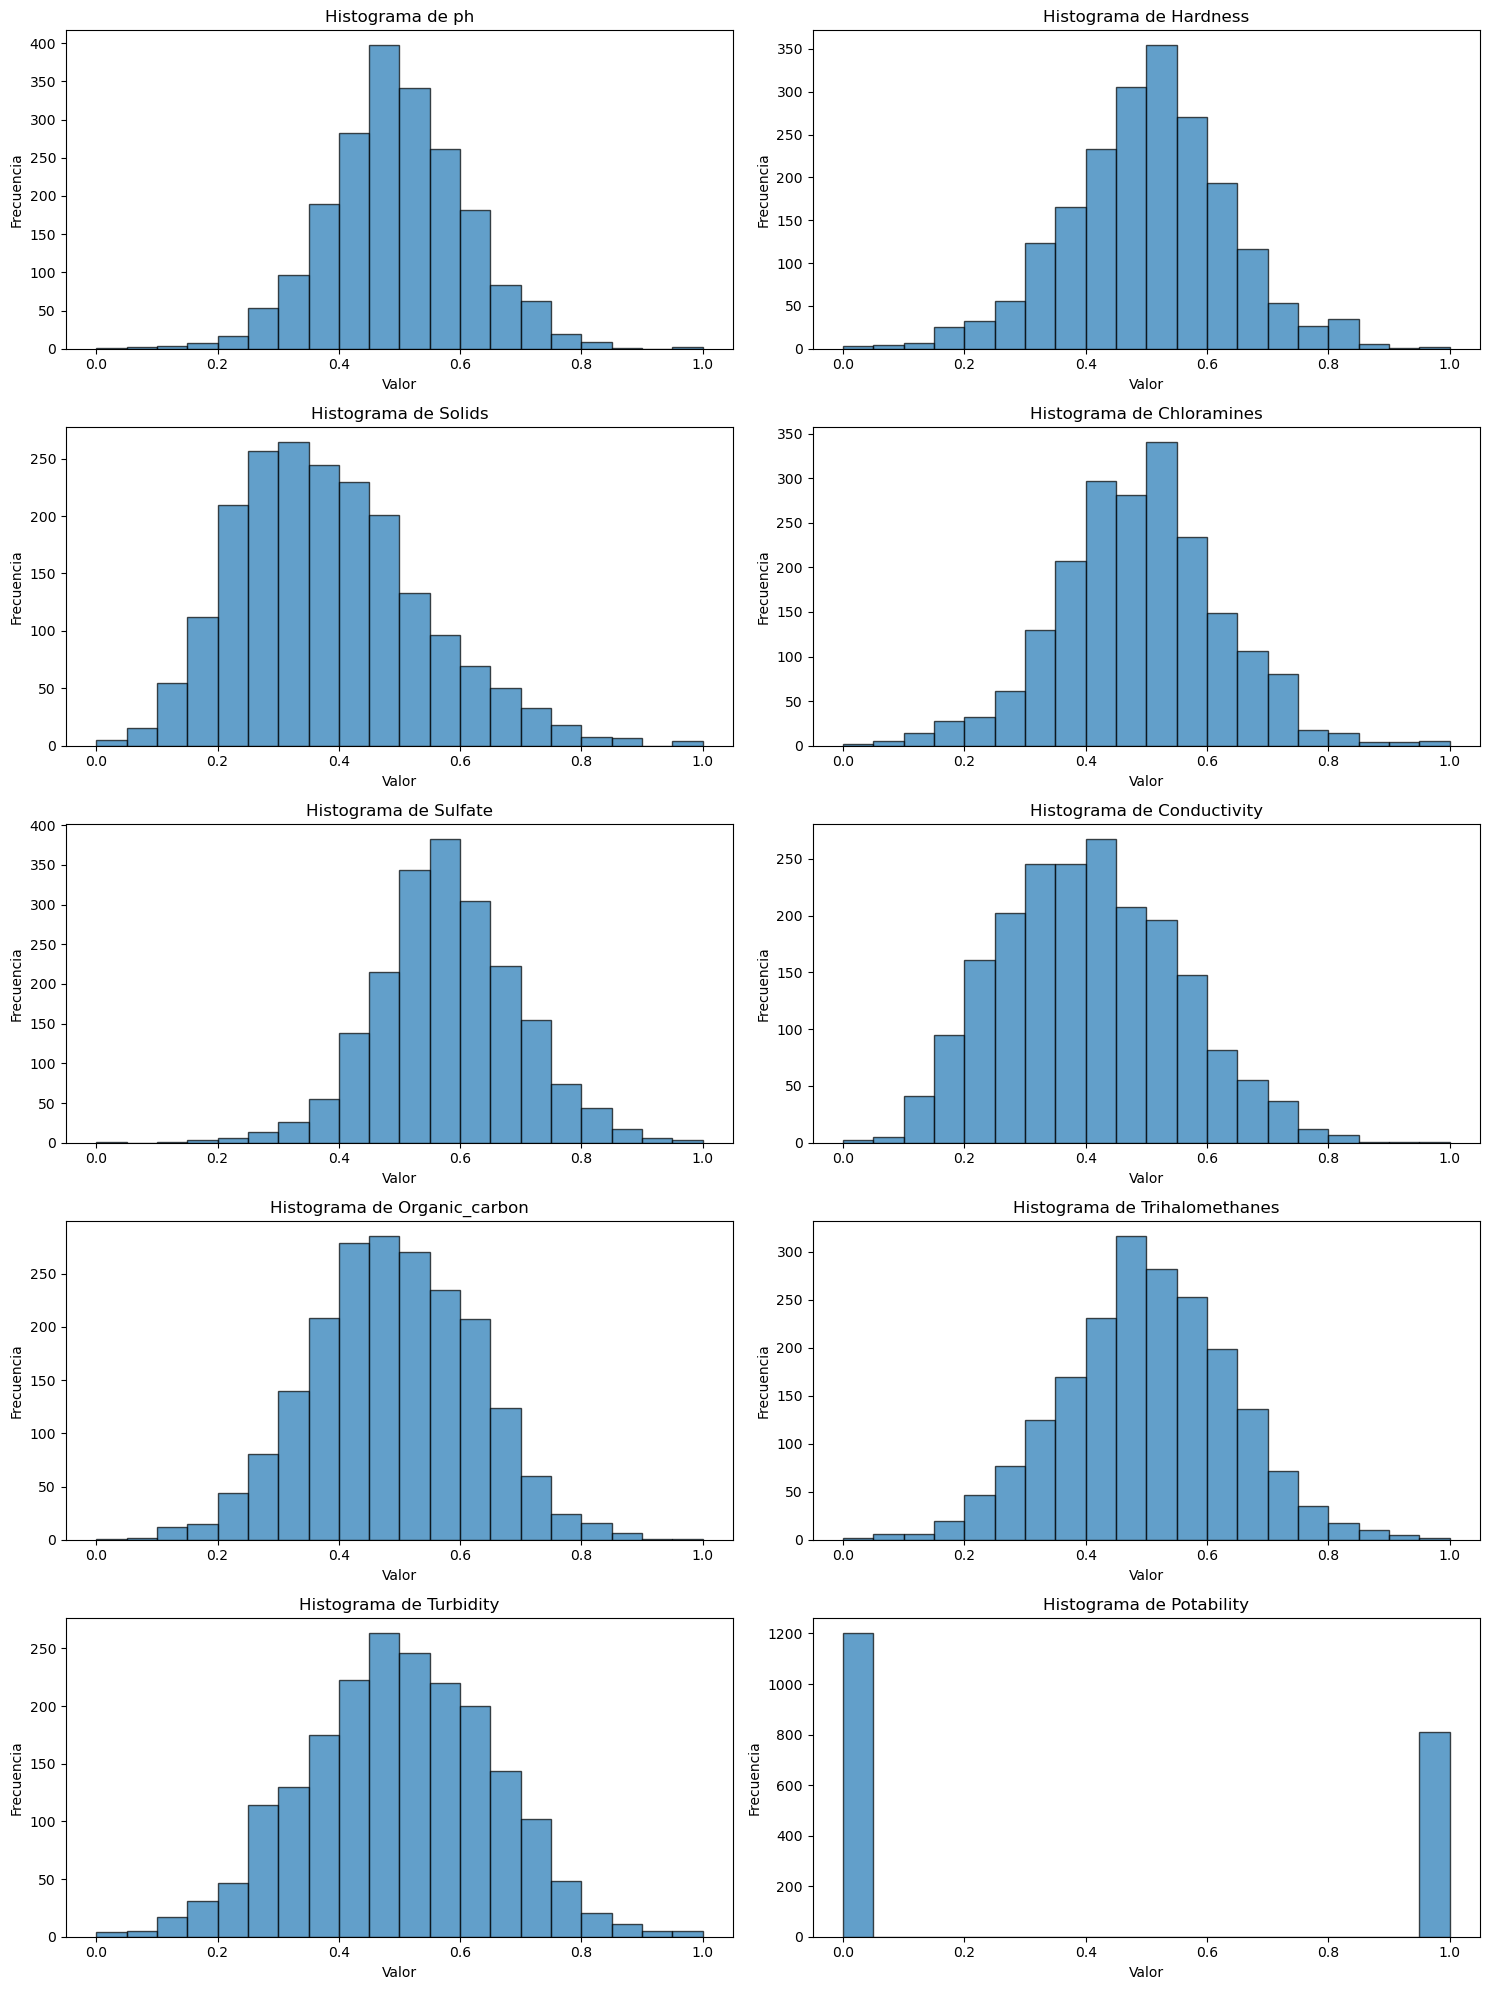

In [36]:
# Configurar la figura con 5 filas y 2 columnas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Generar un histograma para cada columna
for i, col in enumerate(data_scaled.columns):
    ax = axes[i // 2, i % 2]  # Ubicar cada subplot
    ax.hist(data_scaled[col], bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si las columnas son menos de 10
for j in range(len(data_scaled.columns), 10):
    fig.delaxes(axes[j // 2, j % 2])

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

**Explorar las filas que son potables y las no potables**

In [37]:
potable_data = data_clean[data_clean['Potability'] == 1]
potable_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [38]:
no_potable_data = data_clean[data_clean['Potability'] == 0]
no_potable_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


In [39]:
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [50]:
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import xgboost as xgb
import mlflow
import optuna
import matplotlib.pyplot as plt

# Función para configurar experimentos en MLflow
def setup_mlflow_experiment(experiment_name):
    mlflow.set_experiment(experiment_name)

# Guardar gráficos de Optuna
def save_optuna_plots(study, plot_dir):
    os.makedirs(plot_dir, exist_ok=True)
    history_path = os.path.join(plot_dir, "optimization_history.png")
    importance_path = os.path.join(plot_dir, "hyperparameter_importance.png")

    # Historial
    optuna.visualization.matplotlib.plot_optimization_history(study).figure.savefig(history_path)
    plt.close()

    # Importancia de hiperparámetros
    optuna.visualization.matplotlib.plot_param_importances(study).figure.savefig(importance_path)
    plt.close()

    return history_path, importance_path

# Función para obtener el mejor modelo
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    
    # Obtenemos la URI del artefacto y ajustamos la ruta
    artifact_uri = runs[runs["run_id"] == best_model_id].iloc[0].artifact_uri
    artifact_uri = artifact_uri.replace("file:///", "").replace("/", os.sep)  # Limpieza de la URI
    pipeline_path = os.path.join(artifact_uri, "model", "pipeline.pkl")
    
    # Convertir la ruta a absoluta para mayor robustez
    pipeline_path = os.path.abspath(pipeline_path)
    
    # Cargar el pipeline desde la ruta corregida
    with open(pipeline_path, "rb") as f:
        pipeline = pickle.load(f)
    return pipeline

# Función para optimizar el modelo
def optimize_model(X_train, X_valid, y_train, y_valid):
    """Optimiza hiperparámetros de XGBoost y registra resultados en MLflow."""

    # Configuración de experimentos
    experiment_name = "XGBoost_Optimization_" + datetime.now().strftime("%Y%m%d_%H%M%S")
    setup_mlflow_experiment(experiment_name)

    # Guardar las características para usar en predicción
    feature_names = list(X_train.columns)

    # Función objetivo para Optuna
    def objective(trial):
        params = {
            "objective": "binary:logistic",
            "eval_metric": "logloss",
            "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),
        }

        # Iniciar un "run" en MLflow
        try:
            with mlflow.start_run(run_name=f"XGBoost_lr_{params['learning_rate']}_depth_{params['max_depth']}"):
                # Crear pipeline con escalado y modelo
                pipeline = Pipeline([
                    ('scaler', MinMaxScaler()),  # Escalado
                    ('model', xgb.XGBClassifier(**params, use_label_encoder=False))
                ])

                # Entrenar el pipeline
                pipeline.fit(X_train, y_train)

                # Predicciones y cálculo del F1-score
                preds = pipeline.predict(X_valid)
                f1 = f1_score(y_valid, preds)

                # Registrar métricas y parámetros
                mlflow.log_metric("valid_f1", f1)
                mlflow.log_params(params)

                # Guardar el pipeline completo en MLflow
                with open("pipeline.pkl", "wb") as f:
                    pickle.dump(pipeline, f)
                mlflow.log_artifact("pipeline.pkl", artifact_path="model")

                return f1
        finally:
            mlflow.end_run()

    # Crear y optimizar el estudio
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    # Registrar gráficos en MLflow
    with mlflow.start_run(run_name="Optuna Analysis"):
        plot_dir = "./plots"
        history_path, importance_path = save_optuna_plots(study, plot_dir)
        mlflow.log_artifact(history_path, artifact_path="plots")
        mlflow.log_artifact(importance_path, artifact_path="plots")

    # Obtener el mejor modelo usando la función `get_best_model`
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
    best_model = get_best_model(experiment_id)

    return best_model, feature_names

# Función para predecir potabilidad
def predict_potability(pipeline, data_predict, feature_names):
    # Validar columnas
    missing_columns = set(feature_names) - set(data_predict.columns)
    if missing_columns:
        raise ValueError(f"Faltan las siguientes columnas: {missing_columns}")

    # Seleccionar columnas en el orden correcto
    data_predict = data_predict[feature_names]

    # Predicción usando el pipeline
    preds = pipeline.predict(data_predict)
    return preds

# Main
if __name__ == "__main__":
    # Leer archivo
    data = pd.read_csv('water_potability.csv')

    # Eliminar valores faltantes
    data_clean = data.dropna()

    # Dividir los datos en X (predictores) y la variable a predecir
    X = data_clean.drop(columns=['Potability'])
    y = data_clean['Potability']

    # Dividir en conjunto de entrenamiento y validación
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optimizar el modelo
    best_model, feature_names = optimize_model(X_train, X_valid, y_train, y_valid)

    # Ejemplo de predicción
    predictions = predict_potability(best_model, X_valid, feature_names)
    print("Predicciones:", predictions)


2024/11/30 23:06:35 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Optimization_20241130_230635' does not exist. Creating a new experiment.
[I 2024-11-30 23:06:35,570] A new study created in memory with name: no-name-edd00056-b3fc-45ec-bba6-c241cbce541e
[I 2024-11-30 23:06:36,249] Trial 0 finished with value: 0.5102040816326531 and parameters: {'learning_rate': 0.019853909192599547, 'n_estimators': 156, 'max_depth': 10, 'min_child_weight': 2, 'reg_alpha': 0.058918033684398186, 'reg_lambda': 0.8126442661346324}. Best is trial 0 with value: 0.5102040816326531.
[I 2024-11-30 23:06:36,800] Trial 1 finished with value: 0.4744525547445255 and parameters: {'learning_rate': 0.019871319654514597, 'n_estimators': 226, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.8072139686429878, 'reg_lambda': 0.5558144568940858}. Best is trial 0 with value: 0.5102040816326531.
[I 2024-11-30 23:06:37,221] Trial 2 finished with value: 0.5310344827586206 and parameters: {'learning_rate': 0.035

Predicciones: [0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0]


In [53]:
# Crear un DataFrame con las predicciones y los datos originales
results = X_valid.copy()  # Copia los datos originales
results['Predicted_Potability'] = predictions  # Agregar columna de predicciones

In [57]:
pred_0 = results[results['Predicted_Potability'] == 0]
print("Datos con predicción 0:")
pred_0.head()

Datos con predicción 0:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted_Potability
2144,8.157518,236.344440,27931.208402,6.203676,325.323955,511.587664,13.381575,80.686958,4.469431,0
854,8.296344,198.197051,17468.999802,8.262904,369.590740,294.325142,18.026098,44.061625,5.400811,0
637,6.576845,156.221768,12772.095750,9.759898,341.749378,418.972467,10.382253,78.305180,3.771314,0
706,5.393346,172.550261,28099.038729,5.789669,372.621943,505.542349,17.530704,67.273874,4.633855,0
936,5.746529,183.471794,35633.268511,6.066386,327.557850,354.174437,12.548871,70.525972,3.808372,0


In [56]:
pred_1 = results[results['Predicted_Potability'] == 1]
print("Datos con predicción 1:")
pred_1.head()

Datos con predicción 1:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted_Potability
2299,7.606067,248.041453,14609.976883,6.356555,322.356572,275.317146,11.706095,94.775244,4.581477,1
1322,7.053117,240.851770,19500.349983,8.051173,383.667866,377.188125,12.955577,55.522195,5.671999,1
3149,5.731042,223.704966,1351.906979,6.496723,380.514079,620.304639,14.672927,62.023630,3.675807,1
910,6.871607,197.517093,19557.993724,8.311349,355.087258,379.507739,18.240712,65.694230,4.180389,1
1143,6.143018,147.471973,34865.324634,3.684463,285.455102,475.445268,20.939359,54.198520,5.370403,1


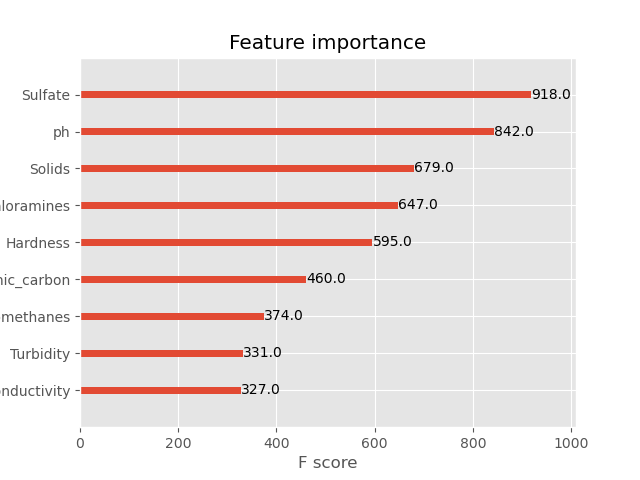

In [58]:
from IPython.display import Image, display
# Mostrar la imagen
display(Image(filename="plots/feature_importance.png"))

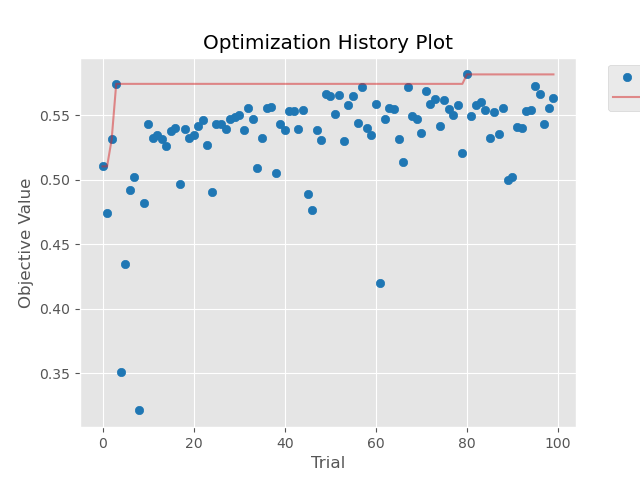

In [59]:
display(Image(filename="plots/optimization_history.png"))

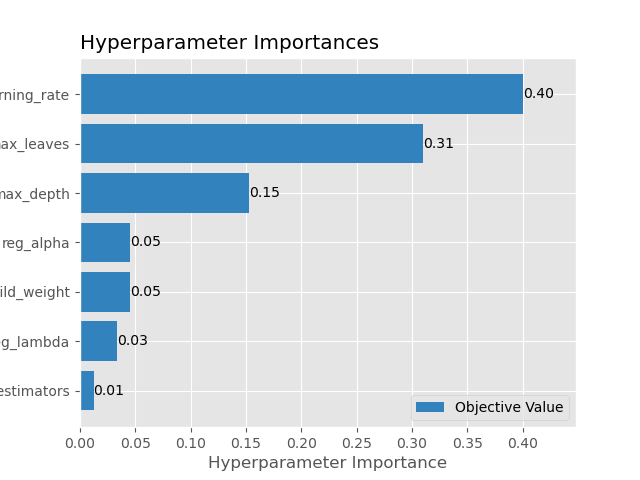

In [60]:
display(Image(filename="plots/param_importance.png"))

In [61]:
import pandas as pd

# Ejemplo de fila para predicción 
single_row = pd.DataFrame({
    "ph": [7.2],
    "Hardness": [180],
    "Solids": [15000],
    "Chloramines": [6.5],
    "Sulfate": [350],
    "Conductivity": [420],
    "Organic_carbon": [15],
    "Trihalomethanes": [80],
    "Turbidity": [3.2]
})

# Predicción para una fila
prediction = predict_potability(best_model, single_row, feature_names)

# Mostrar el resultado
print("Predicción para la fila:", prediction)

Predicción para la fila: [0]


**Resultado**
Dado que el resultado es 0, entonces el agua no es potable. 

**Comando en Anaconda Prompt**

Primero se navegó a la carpeta donde están los mlruns a través del comando cd.

Luego, ejecute mlflow ui --port 8089 (use otro puerto distinto al por defecto, porque el que entrega por defecto no me funcionó)

Finalmente en mlflow podemos ver los intentos 

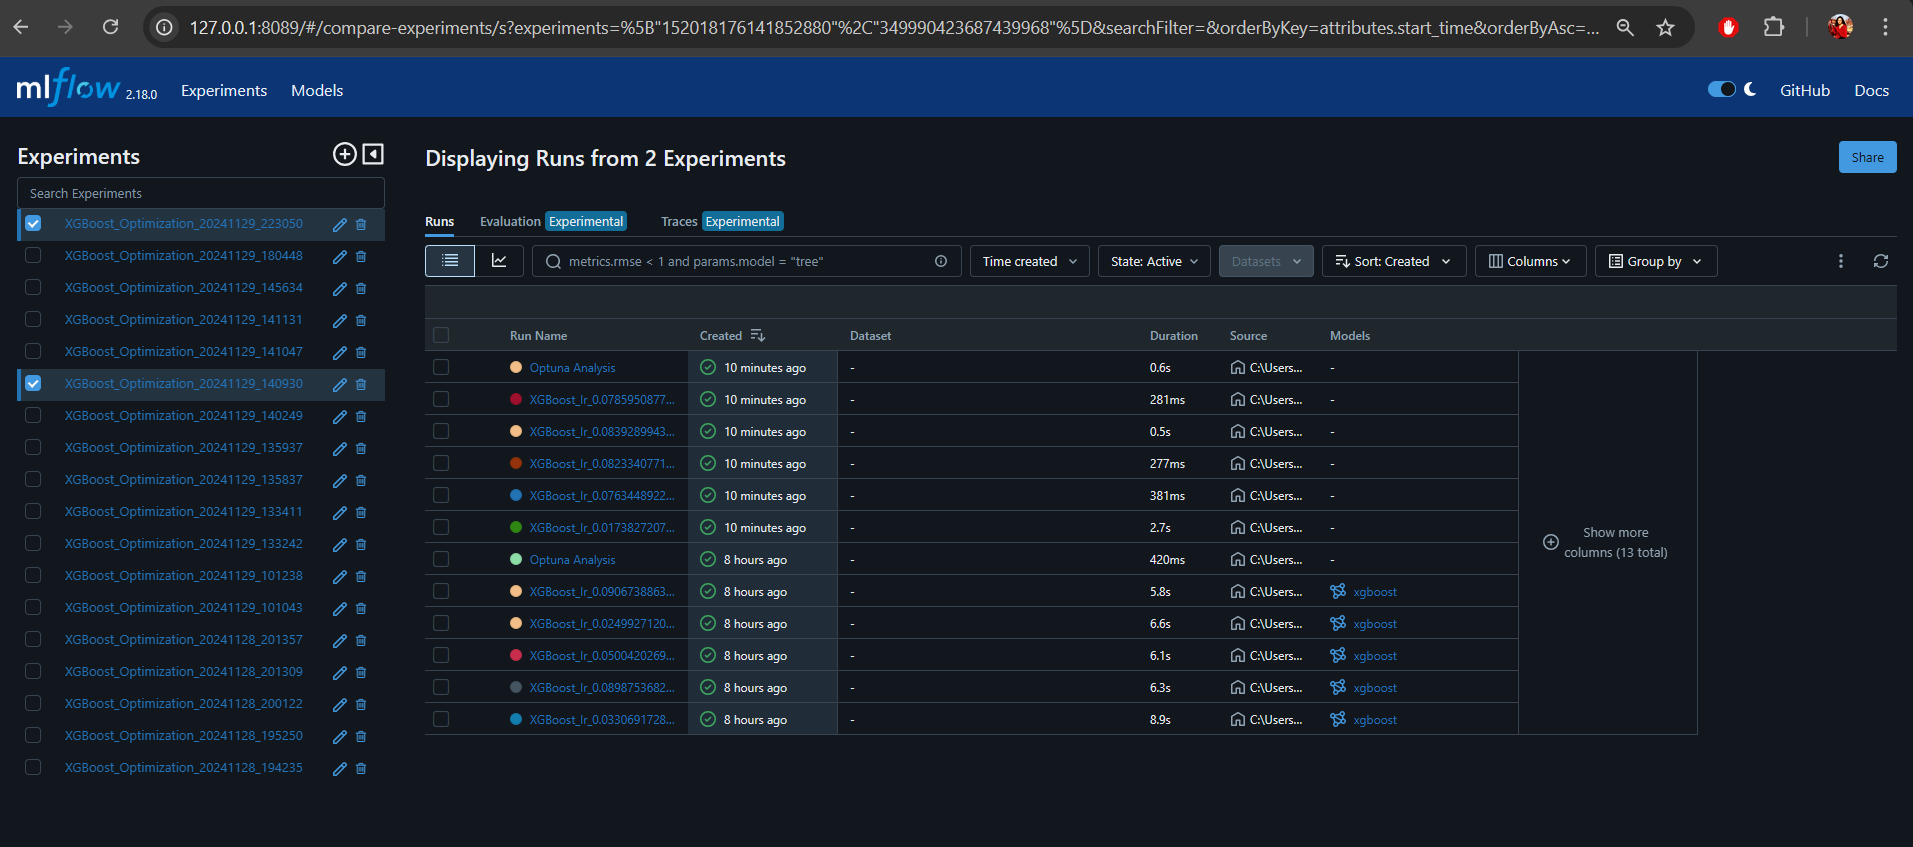

In [22]:
# Experimentos en mlflow
display(Image(filename="mlflow_foto.png"))

**Archivo optimize.py**

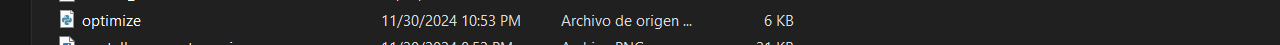

In [62]:
# archivo optimize creado
display(Image(filename="archivo_optimize.png"))

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

In [47]:
#pip install "fastapi[all]"

- Se creó el archivo main.py

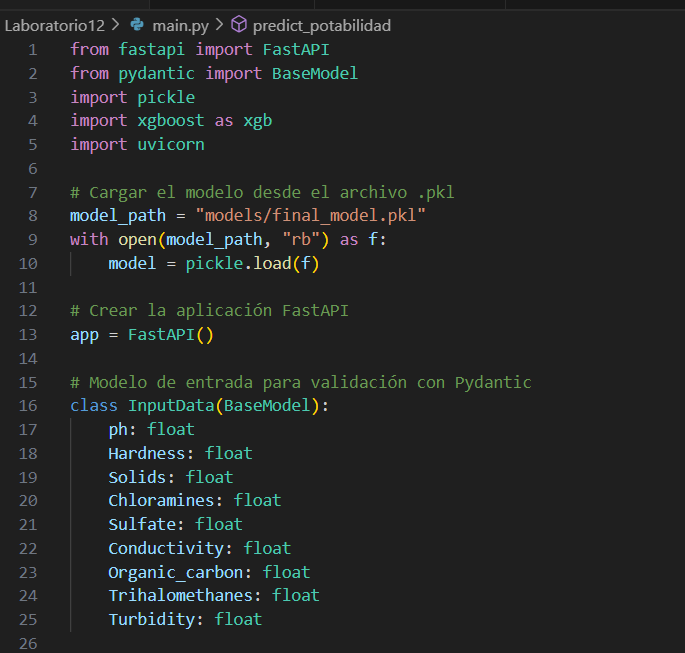

In [25]:
# archivo main.py
display(Image(filename="main1.png", width=500, height=500))

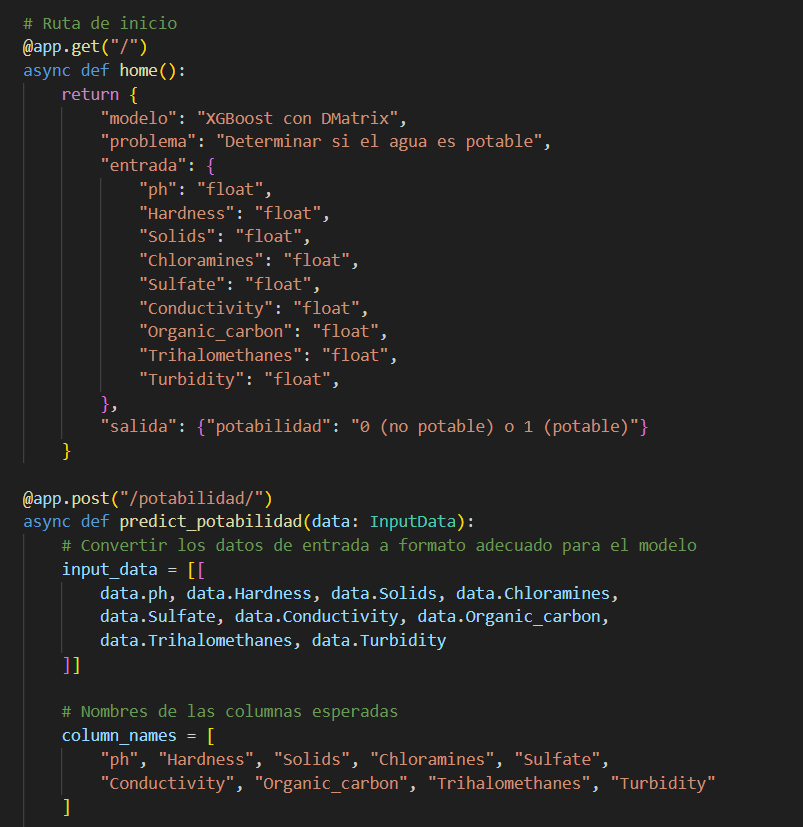

In [26]:
display(Image(filename="main2.png", width=500, height=500))

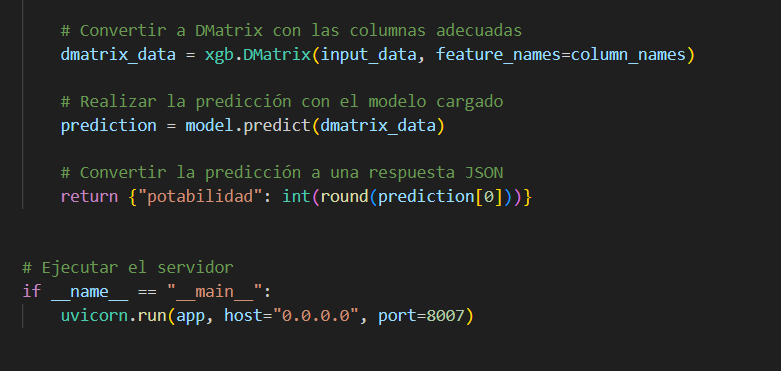

In [27]:
display(Image(filename="main3.png", width=500, height=500))

**Lineas ejecutadas en anaconda pompt**

python main.py

#Resultado
dirección : http://127.0.0.1:8007

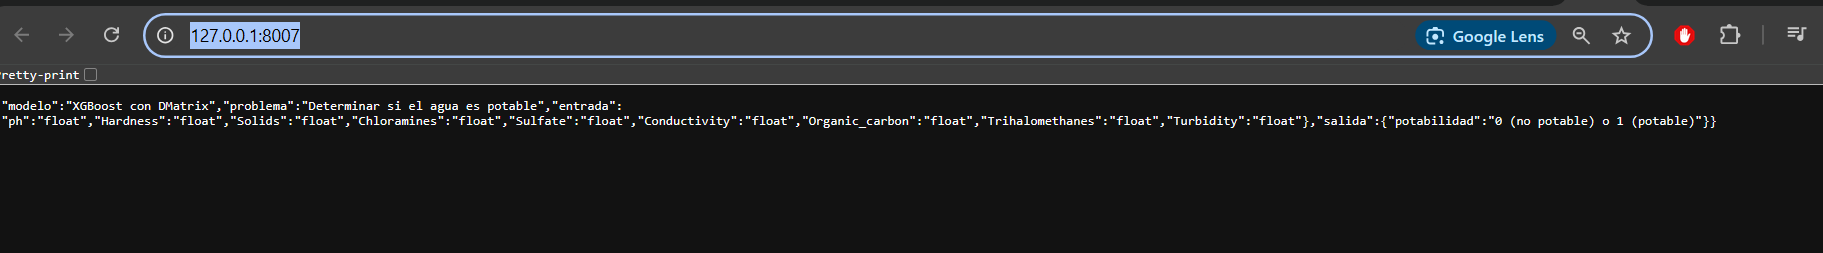

In [16]:
# Mostrar la imagen
display(Image(filename="pantallazo_puerto_main_py.png"))

In [ ]:
#Entrar a la página 
http://127.0.0.1:8007/docs

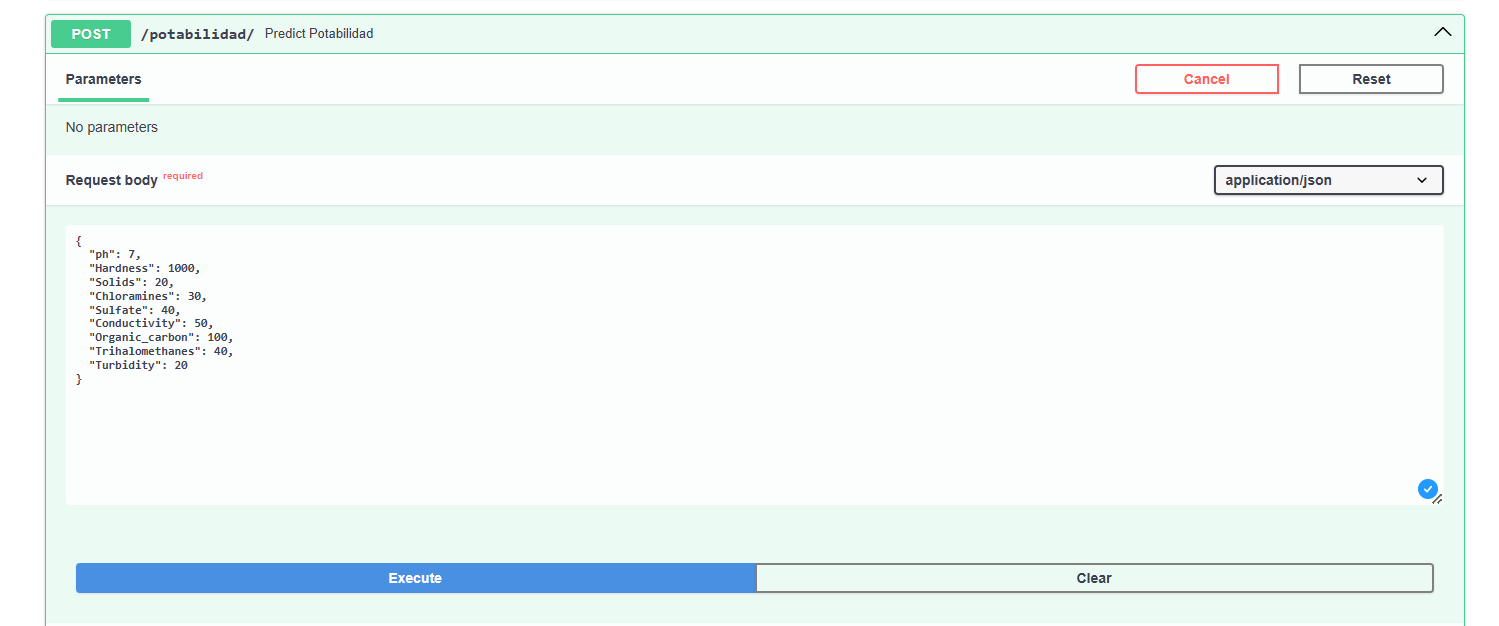

In [22]:
# Api, ingresando valores para predecir potabilidad
display(Image(filename="app1.png", width=600, height=400))

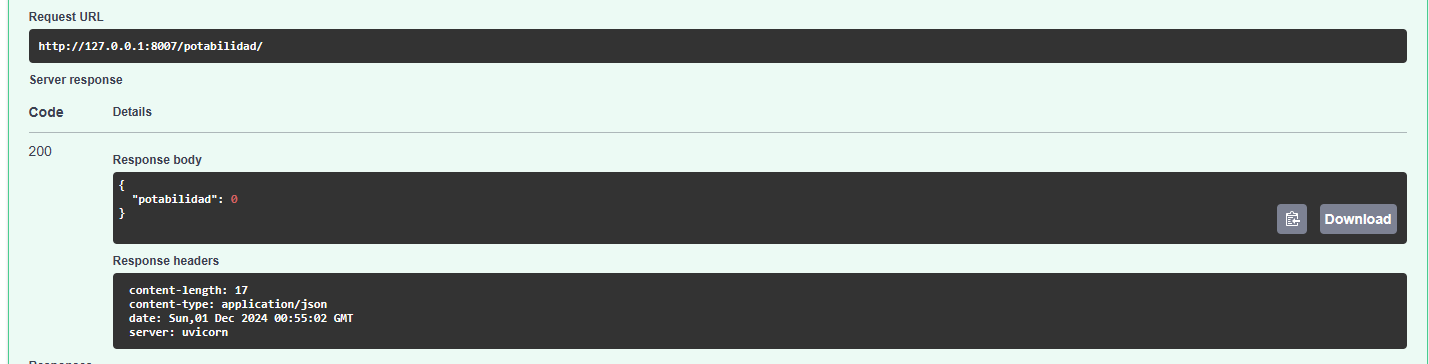

In [23]:
# Api, recibiendo resultado
display(Image(filename="app2.png", width=600, height=400))

En este caso del ejemplo, da que la potabilidad es 0, por lo que el agua no es potable. 

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

**Comando en docker**

#Crear un dockerfile
touch Dockerfile

#Crear un dockerignore
touch .dockerignore

#Crear archivo requirements.txt
touch requirements.txt

#Luego se llenaron estos archivos como se muestra a continuación


**Archivos generados: dockerfile, requirenments, dockerignore**

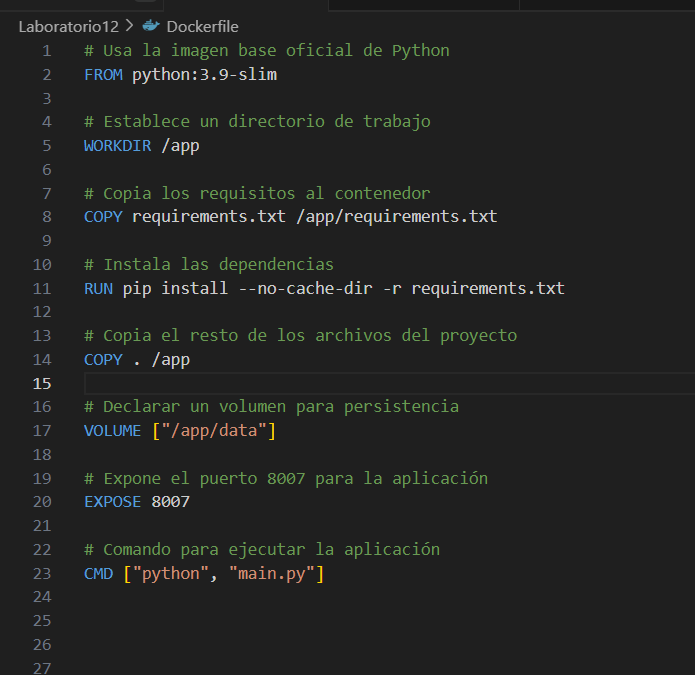

In [6]:
display(Image(filename="dockerfile.png", width=300, height=200))

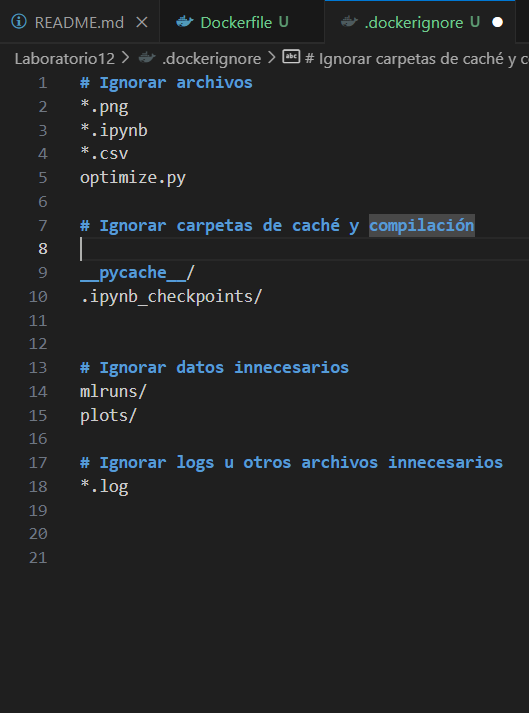

In [7]:
display(Image(filename="foto_ignore.png", width=300, height=200))

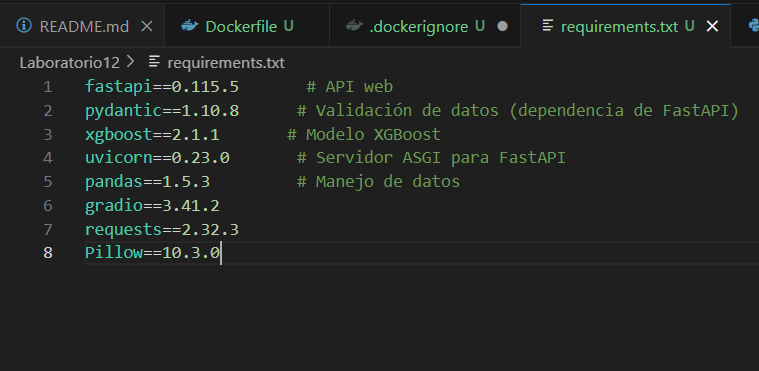

In [8]:
display(Image(filename="requirenment.png", width=300, height=200))

**Crear imagen, ejecutar contenedor, exponer el puerto**

docker build -t potabilidad-app .
docker build --no-cache -t potabilidad-app .#volver a correr en los distintos intentos 

#Ejecutar un contenedor con base en la imagen guardada
docker run -p 8007:8007 potabilidad-app



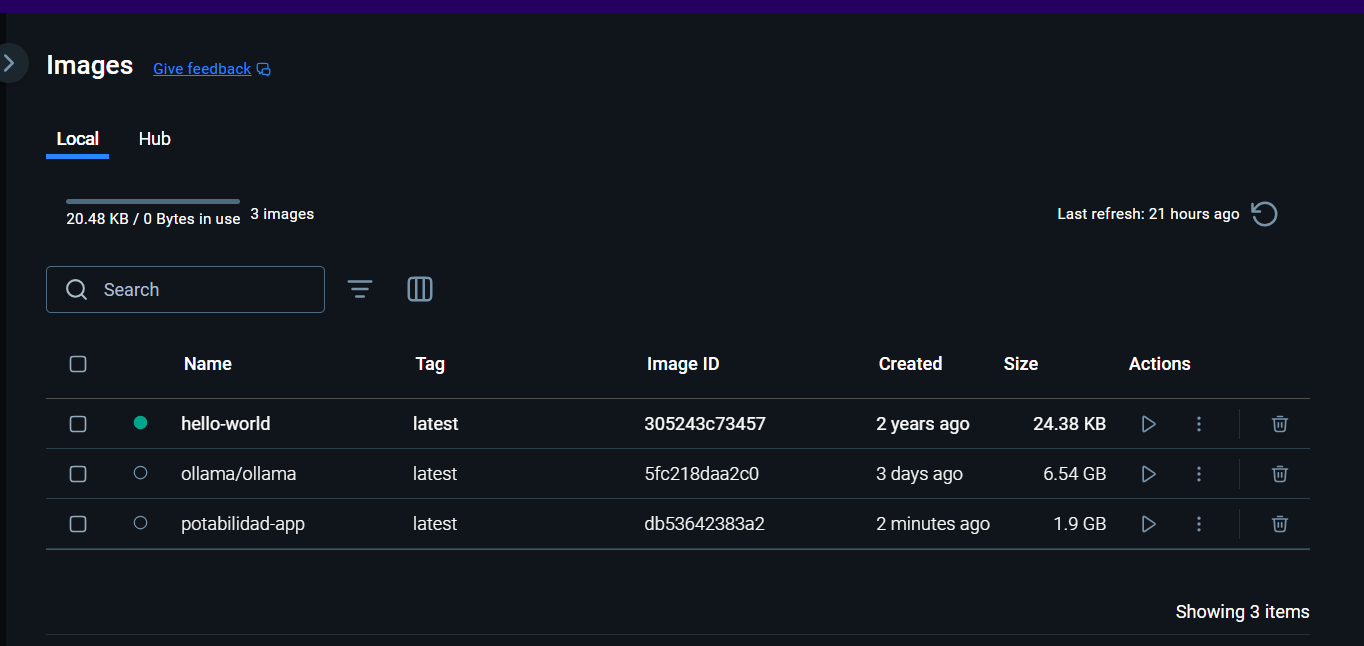

In [13]:
display(Image(filename="crea_imagen_docker.png", width=600, height=400))

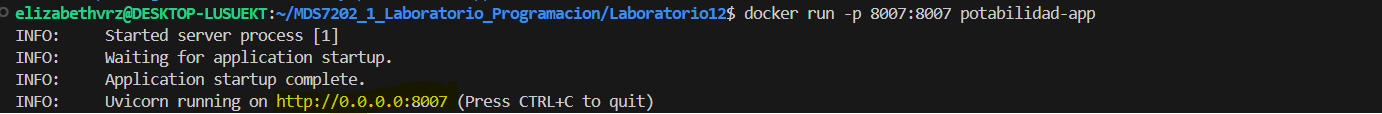

In [10]:
display(Image(filename="container_puerto.png"))

**Configurar un volumen y ejecutar denuevo el contenedor**
- Primero cree la carpeta docker_prueba dentro de mi carpeta local.
- Configure que la salida se guarde 
docker run -p 8007:8007 -v /home/elizabethvrz/MDS7202_1_Laboratorio_Programacion/Laboratorio12/docker_pruebaa:/app/data potabilidad-app

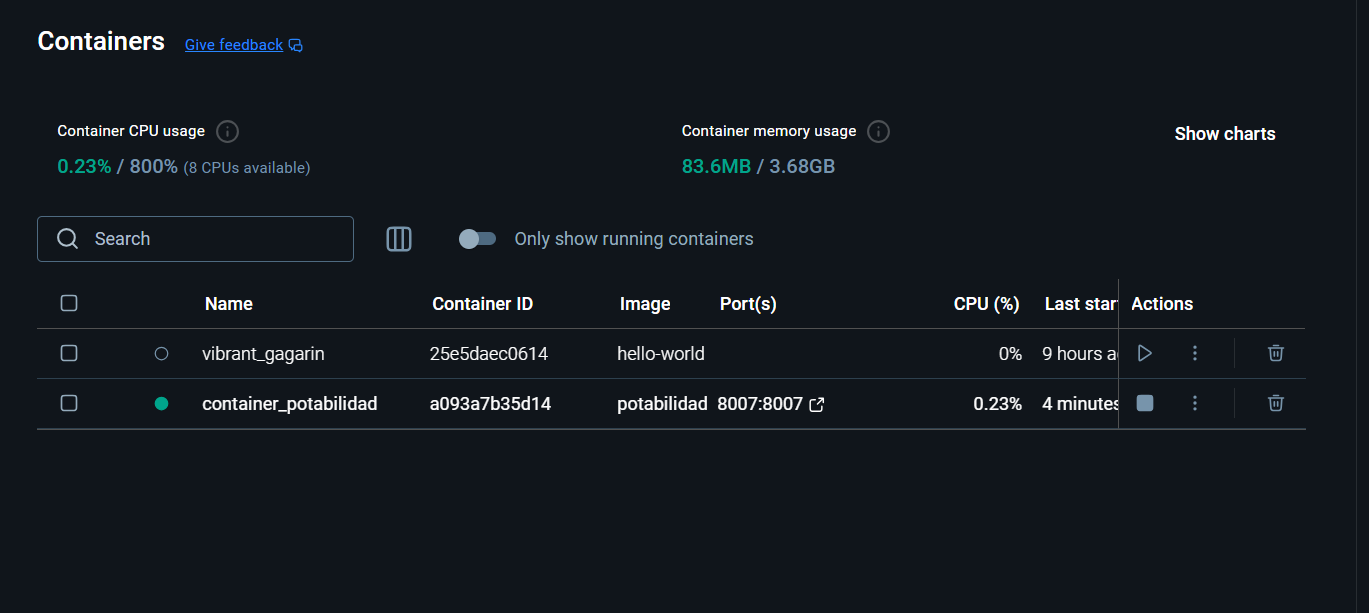

In [15]:
display(Image(filename="container.png", width=600, height=400))

Desde el contenedor o desde la dirección en el terminal se puede acceder a la API que se creo antes. 

**Revisar y comentar los recursos utilizados por el contenedor**


- docker start a093a7b35d14c232ec7ae061216e22f63c19f60c26e118b0b1b9b19ac20d92c7 # iniciar el container
- docker stats a093a7b35d14c232ec7ae061216e22f63c19f60c26e118b0b1b9b19ac20d92c7 #inspeccionar


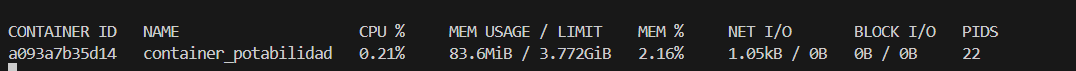

In [4]:
display(Image(filename="analisis_container.png"))

El contenedor container_potabilidad consume únicamente el 0.21% de CPU y utiliza aproximadamente 83.6 Megabytes de memoria, lo que demuestra que es liviano en términos de recursos. El uso de red y disco es prácticamente nulo, mientras que el número de procesos activos es moderado (22), lo que sugiere un rendimiento eficiente y optimizado.

**1. ¿Cómo se diferencia Docker de una máquina virtual (VM)?**

Docker se diferencia de una máquina virtual (VM) porque no requiere un sistema operativo completo para cada aplicación que ejecuta. En vez de virtualizar hardware como lo hacen las VM, Docker utiliza contenedores para encapsular aplicaciones junto con sus dependencias y se ejecuta directamente sobre el kernel del sistema operativo. Esto lo hace más liviano, eficiente y rápido de iniciar en comparación con las VM, que requieren su propio sistema operativo y pueden consumir más recursos.

**2. ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?**

Cuando ejecutas una aplicación directamente en el sistema local, las configuraciones, dependencias y librerías pueden entrar en conflicto con otras aplicaciones instaladas, además de no ser fácilmente replicables. Docker, en cambio, crea un contenedor aislado que incluye todas las dependencias necesarias, lo que evita conflictos, asegura un entorno consistente y permite portar fácilmente la aplicación entre sistemas.

**3. ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?**

Docker asegura la consistencia entre entornos mediante el uso de contenedores que empaquetan todo lo necesario para ejecutar la aplicación, como librerías, configuraciones y dependencias. Al utilizar un Dockerfile o una imagen específica, se garantiza que el entorno de desarrollo sea idéntico al de producción, eliminando problemas relacionados con discrepancias de configuración.

**4. ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?**

Los volúmenes en Docker se utilizan para almacenar datos persistentes que deben sobrevivir a la vida de un contenedor. Estos volúmenes pueden configurarse al crear un contenedor y se gestionan a través de comandos como docker volume create o especificándolos en docker-compose.yml. Permiten que los datos permanezcan disponibles incluso si los contenedores se eliminan o reinician.

**5. ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?**

Un Dockerfile es un archivo de texto que contiene instrucciones para construir una imagen de Docker personalizada, definiendo el sistema base, dependencias y configuraciones necesarias para una aplicación. Por otro lado, docker-compose.yml es un archivo YAML que permite definir y orquestar múltiples contenedores, configurando cómo se relacionan entre sí, sus redes, volúmenes y variables de entorno en un solo lugar.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>